In [1]:
# %pip install pandas
# %pip install numpy
# %pip install scikit-learn
# %pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
customer = pd.read_csv("./Data/Customers.csv")
products = pd.read_csv("./Data/Products.csv")
transactions = pd.read_csv("./Data/Transactions.csv")

In [4]:
customer.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [5]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [6]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [7]:
# checking for null values in any of the dataframes
customer.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [8]:
products.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [9]:
transactions.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

### Number of Customers in each Regions

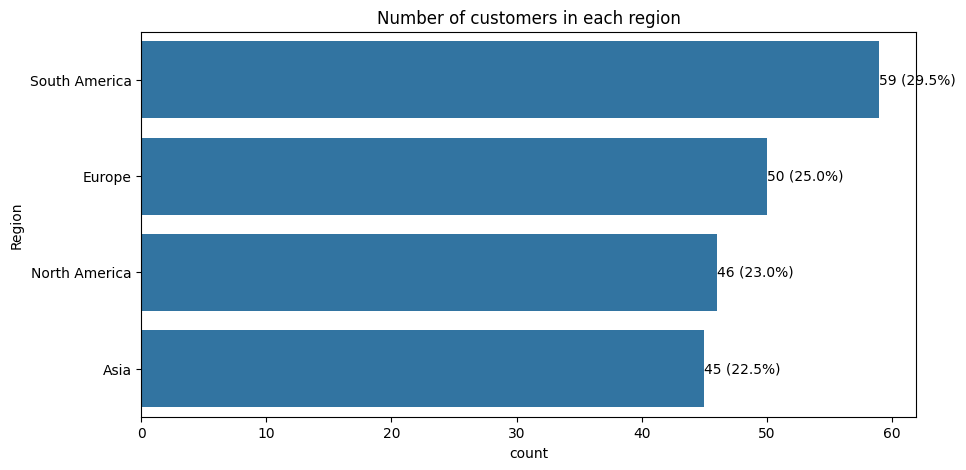

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(data=customer, y="Region", order=customer["Region"].value_counts().index)
plt.title("Number of customers in each region")
for i in range(customer["Region"].nunique()):
    count = customer["Region"].value_counts().values[i]
    plt.text(count, i, f"{count} ({round(count/customer.shape[0]*100, 2)}%)", va='center')
plt.show()

### Customer Monthly Signups

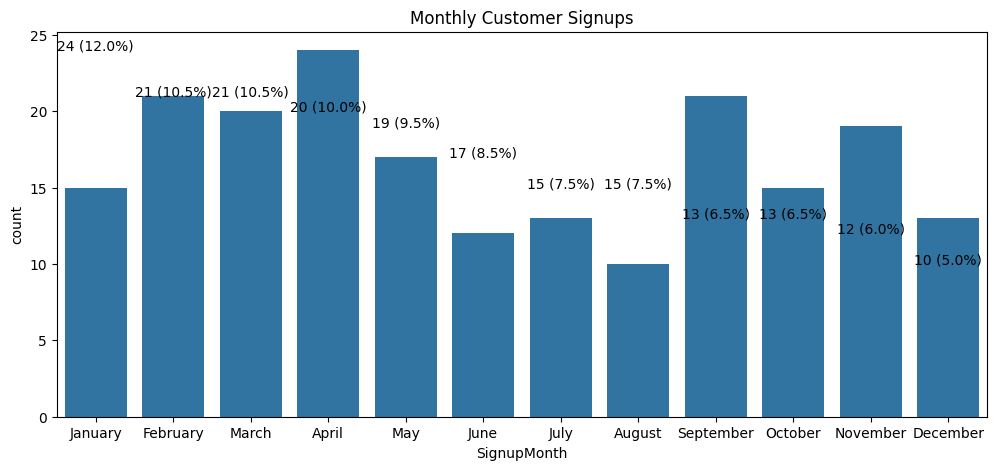

In [11]:
customer['SignupDate'] = pd.to_datetime(customer['SignupDate'])

customer['SignupMonth'] = customer['SignupDate'].dt.month_name()
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

plt.figure(figsize=(12,5))
sns.countplot(data=customer, x='SignupMonth', order=month_order)
for i in range(customer['SignupMonth'].nunique()):
    count = customer['SignupMonth'].value_counts().values[i]
    plt.text(i, count, f"{count} ({round(count/customer.shape[0]*100, 2)}%)", ha='center')
plt.title("Monthly Customer Signups");

### Price Distribution per product category

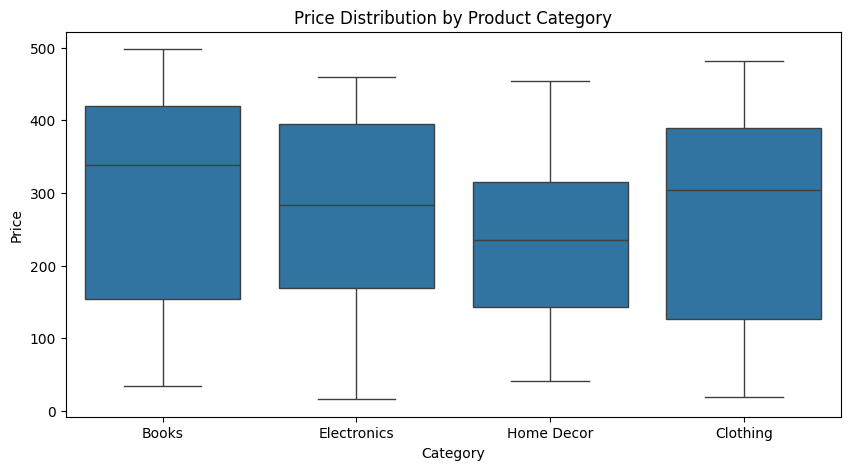

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(data=products, x='Category', y='Price')
plt.title("Price Distribution by Product Category");

### Monthly Transaction Value

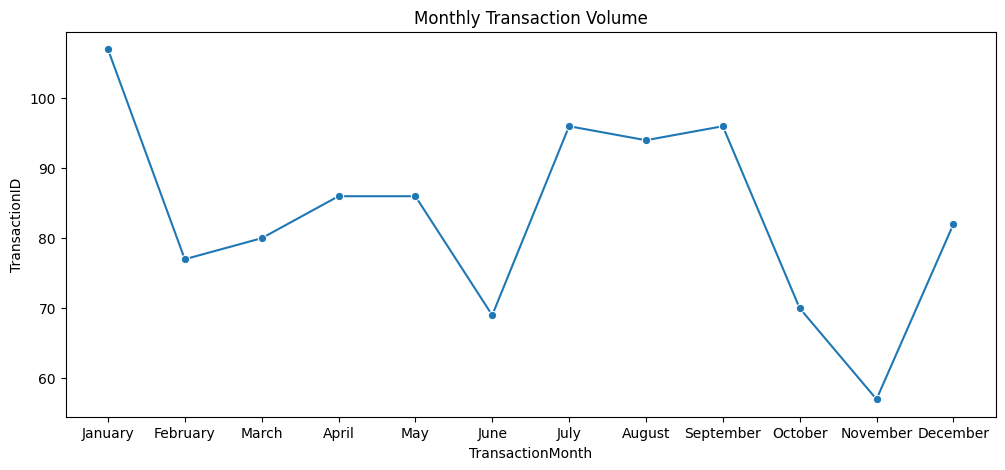

In [13]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['TransactionMonth'] = transactions['TransactionDate'].dt.month_name()
monthly_transactions = transactions.groupby('TransactionMonth', observed=False)['TransactionID'].count().reindex(month_order)

plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_transactions, marker='o')
plt.title("Monthly Transaction Volume");

### Customer Signup per year

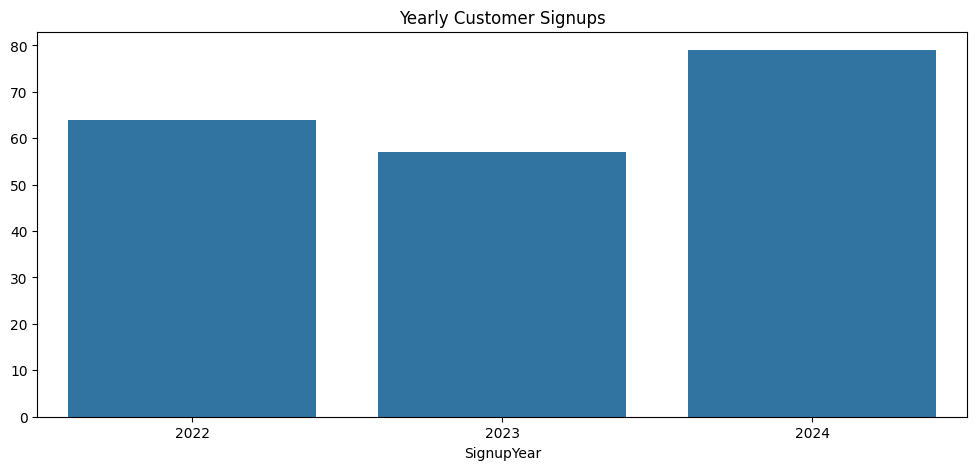

In [14]:
# customer signup per year
customer['SignupYear'] = customer['SignupDate'].dt.year
yearly_signups = customer.groupby('SignupYear', observed=False)['CustomerID'].count()

plt.figure(figsize=(12,5))
sns.barplot(x=yearly_signups.index, y=yearly_signups.values)
plt.title("Yearly Customer Signups");


### Avg quantity purchased per month

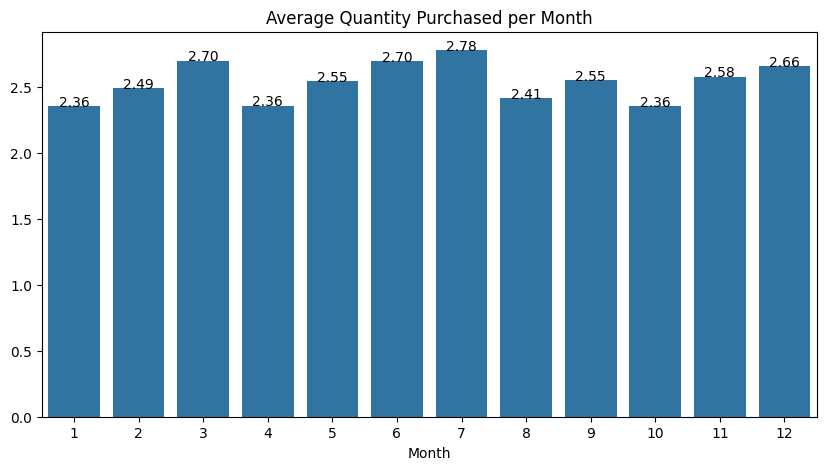

In [16]:
transactions['Month'] = transactions['TransactionDate'].dt.month
monthly_quantity = transactions.groupby('Month')['Quantity'].mean()

plt.figure(figsize=(10,5))
sns.barplot(x=monthly_quantity.index, y=monthly_quantity.values)
for i in range(monthly_quantity.shape[0]):
    plt.text(i, monthly_quantity.values[i], f"{monthly_quantity.values[i]:.2f}", ha='center')
plt.title("Average Quantity Purchased per Month");

### Total Sales per regions

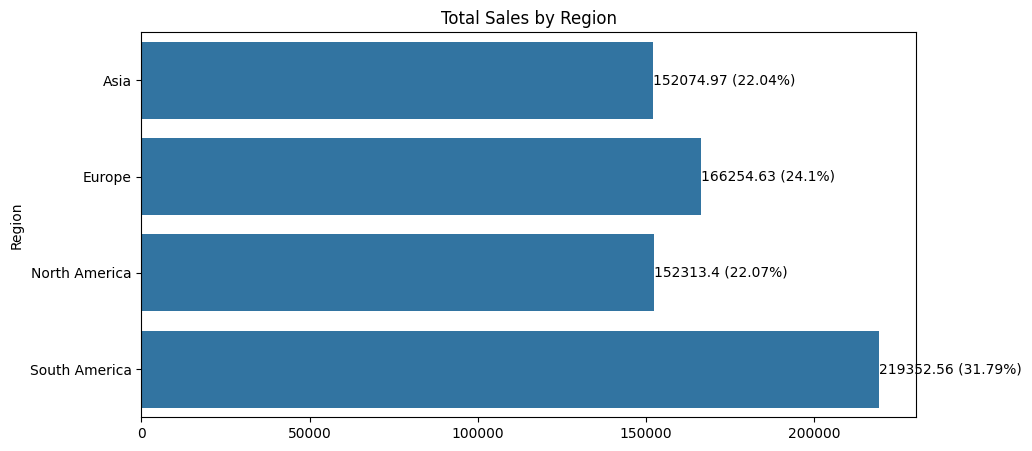

In [17]:
merged_data = transactions.merge(customer, on='CustomerID')
regional_sales = merged_data.groupby('Region')['TotalValue'].sum()

plt.figure(figsize=(10,5))
sns.barplot(x=regional_sales.values, y=regional_sales.index)
# add percentage of total sales to each bar
for i in range(regional_sales.nunique()):
    count = regional_sales.values[i]
    plt.text(count, i, f"{count} ({round(count/merged_data['TotalValue'].sum()*100, 2)}%)", va='center')
plt.title("Total Sales by Region");

### Percentile system for purchase

In [18]:
customer_value = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
print(f"Top 5% customers generate {customer_value[:10].sum()/customer_value.sum():.1%} of revenue")

Top 5% customers generate 11.0% of revenue


### Total Sales per category

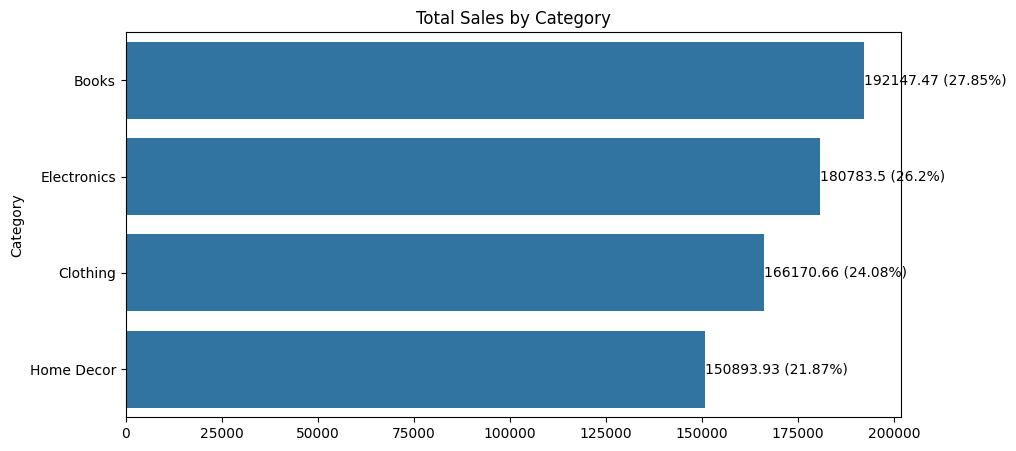

In [19]:
merged_data_with_category = merged_data.merge(products[['ProductID', 'Category']], on='ProductID')


category_sales = merged_data_with_category.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=category_sales.values, y=category_sales.index)
for i in range(category_sales.nunique()):
    count = category_sales.values[i]
    plt.text(count, i, f"{count} ({round(count/merged_data_with_category['TotalValue'].sum()*100, 2)}%)", va='center')
plt.title("Total Sales by Category");


### Monthly sales per category

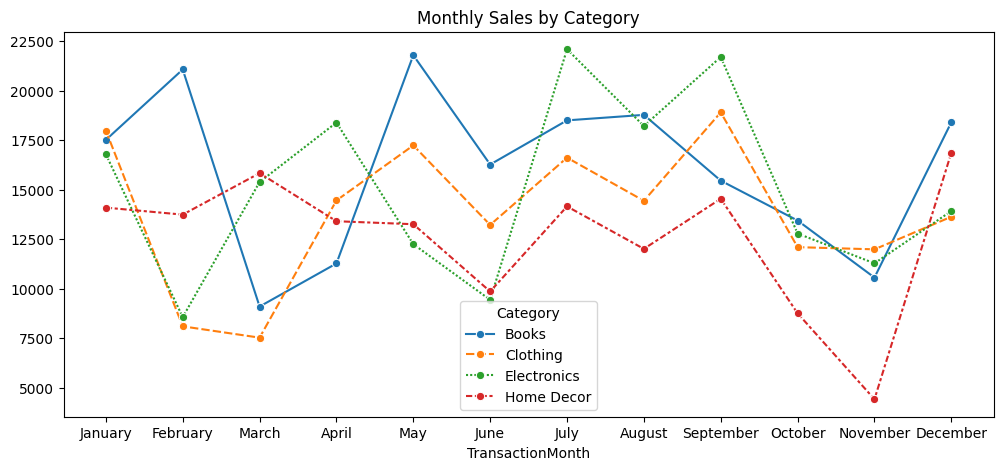

In [ ]:

monthly_category_sales = merged_data_with_category.groupby(['TransactionMonth', 'Category'])['TotalValue'].sum().unstack().reindex(month_order)

plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_category_sales, marker='o')
plt.title("Monthly Sales by Category");

